# Exploratory Data Analysis 
## MLB Statistics by Team - Current Season

This notebook documents an Exploratory Data Analysis of the compiled MLB statistics dataset that will be analyzed in an effort to predict game outcomes. This analysis seeks to visualize the data in order to provide key insights in terms of potential predictive features and relationships that can be exploited using machine learning models. 

### Notebook Setup

The following code cell adds the root directory of the project to Python's `sys.path` in order to access modules from different directory levels.

In [63]:
import sys
from pathlib import Path

notebook_module = Path.cwd()
project_root = notebook_module.parent.parent.parent
sys.path.append(str(project_root))

The next code cell allows the notebook to access and load environment variables that are required for configuring the database connection.

In [64]:
from dotenv import load_dotenv

dotenv_path = project_root / 'api/.env'
load_dotenv(dotenv_path)

True

Import the necessary dependencies.

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from shared.database import connect_to_db

### Analysis

After connecting to the PostgreSQL database, read the appropriate tables into Pandas DataFrames.

In [66]:
session = connect_to_db()

teams_df = pd.read_sql_table('mlb_teams', session.bind)
offensive_stats_df = pd.read_sql_table('mlb_offensive_stats', session.bind)
defensive_stats_df = pd.read_sql_table('mlb_defensive_stats', session.bind)
schedule_df = pd.read_sql_table('mlb_schedule', session.bind)
teams_df.head()

,id,name,division,games_played,wins,losses,winning_percentage
0,147,New York Yankees,American League East,162,94,68,0.580
1,110,Baltimore Orioles,American League East,162,91,71,0.562
2,111,Boston Red Sox,American League East,162,81,81,0.500
3,139,Tampa Bay Rays,American League East,162,80,82,0.494
4,141,Toronto Blue Jays,American League East,162,74,88,0.457


In [67]:
teams_df.drop(columns=['id', 'games_played']).describe()

,wins,losses,winning_percentage
count,30.000000,30.000000,30.000000
mean,80.966667,80.966667,0.499967
std,12.469226,12.521659,0.077075
min,41.000000,64.000000,0.253000
25%,76.250000,73.000000,0.470500
50%,83.000000,79.000000,0.512000
75%,89.000000,85.750000,0.549000
max,98.000000,121.000000,0.605000


In [68]:
recent_offensive_stats = offensive_stats_df.sort_values('date').groupby('team_id').last().reset_index()
merged_offensive = pd.merge(teams_df, recent_offensive_stats, left_on='id', right_on='team_id')

merged_offensive.head()

,id_x,name,division,games_played,wins,losses,winning_percentage,team_id,id_y,date,team_batting_average,runs_scored,home_runs,on_base_percentage,slugging_percentage
0,147,New York Yankees,American League East,162,94,68,0.580,147,226,2024-10-15,0.248,815,237,0.333,0.429
1,110,Baltimore Orioles,American League East,162,91,71,0.562,110,227,2024-10-15,0.250,786,235,0.315,0.435
2,111,Boston Red Sox,American League East,162,81,81,0.500,111,228,2024-10-15,0.252,751,194,0.319,0.423
3,139,Tampa Bay Rays,American League East,162,80,82,0.494,139,229,2024-10-15,0.230,604,147,0.302,0.366
4,141,Toronto Blue Jays,American League East,162,74,88,0.457,141,230,2024-10-15,0.241,671,156,0.313,0.389


Now, let's explore the relationships between how the number of wins and both a team's batting average and number of runs scored.

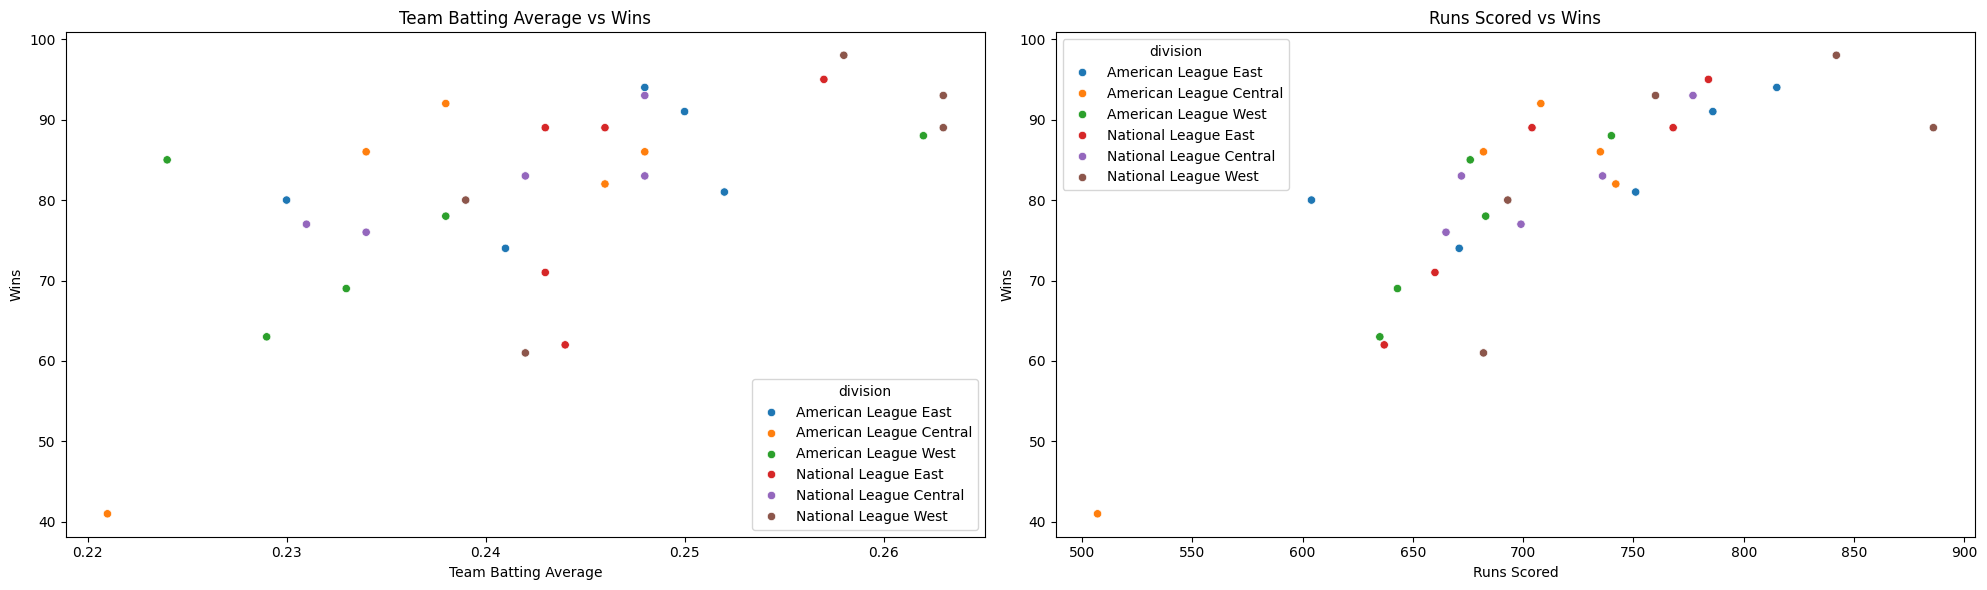

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data=merged_offensive, x='team_batting_average', y='wins', hue='division', ax=axes[0])
axes[0].set_title('Team Batting Average vs Wins')
axes[0].set_xlabel('Team Batting Average')
axes[0].set_ylabel('Wins')

sns.scatterplot(data=merged_offensive, x='runs_scored', y='wins', hue='division', ax=axes[1])
axes[1].set_title('Runs Scored vs Wins')
axes[1].set_xlabel('Runs Scored')
axes[1].set_ylabel('Wins')

plt.tight_layout()
plt.show()

In [70]:
recent_defensive_stats = defensive_stats_df.sort_values('date').groupby('team_id').last().reset_index()
merged_defensive = pd.merge(teams_df, recent_defensive_stats, left_on='id', right_on='team_id')
merged_defensive.head()

,id_x,name,division,games_played,wins,losses,winning_percentage,team_id,id_y,date,team_era,runs_allowed,whip,strikeouts,avg_against
0,147,New York Yankees,American League East,162,94,68,0.580,147,226,2024-10-15,3.74,668,1.24,1457,0.233
1,110,Baltimore Orioles,American League East,162,91,71,0.562,110,227,2024-10-15,3.94,699,1.24,1380,0.238
2,111,Boston Red Sox,American League East,162,81,81,0.500,111,228,2024-10-15,4.04,747,1.26,1353,0.246
3,139,Tampa Bay Rays,American League East,162,80,82,0.494,139,229,2024-10-15,3.77,663,1.20,1406,0.236
4,141,Toronto Blue Jays,American League East,162,74,88,0.457,141,230,2024-10-15,4.29,743,1.27,1314,0.243


Simlarly, let's see how a team's ERA and their opponents' batting averages affect their performance, in terms of total number of wins. 

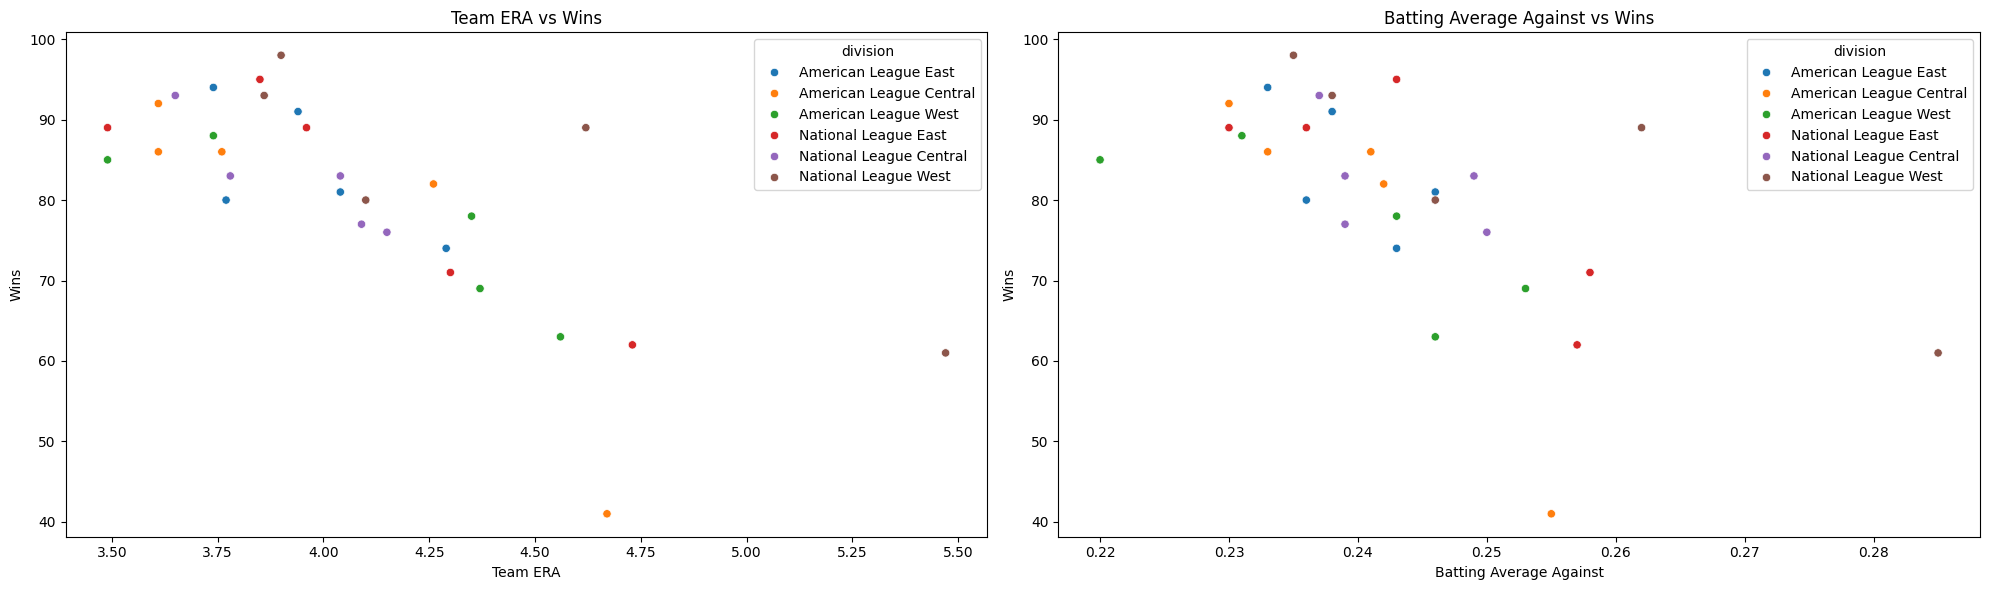

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.scatterplot(data=merged_defensive, x='team_era', y='wins', hue='division', ax=axes[0])
axes[0].set_title('Team ERA vs Wins')
axes[0].set_xlabel('Team ERA')
axes[0].set_ylabel('Wins')

sns.scatterplot(data=merged_defensive, x='avg_against', y='wins', hue='division', ax=axes[1])
axes[1].set_title('Batting Average Against vs Wins')
axes[1].set_xlabel('Batting Average Against')
axes[1].set_ylabel('Wins')

plt.tight_layout()
plt.show()